In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

In [3]:
import fredkey
fred = Fred(api_key=fredkey.key) # Jeg skuler min nøkkel her. Skaff din egen.

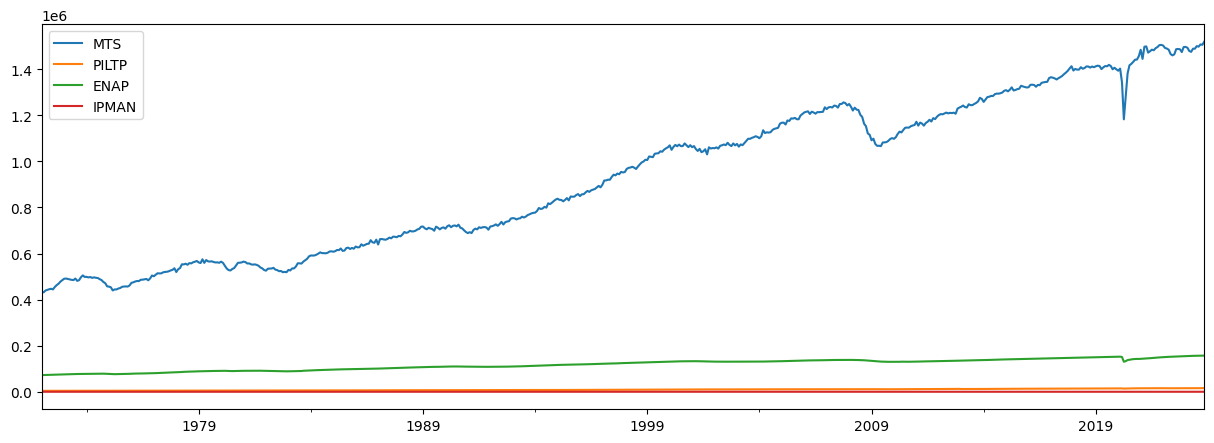

,MTS,PILTP,ENAP,IPMAN
1972-01-01,436061.565,4208.2,72441.0,35.9488
1972-02-01,431354.862,4231.9,72648.0,36.2194
1972-03-01,439346.765,4259.5,72944.0,36.4664
1972-04-01,442331.562,4273.3,73162.0,36.8786
1972-05-01,445055.610,4291.2,73469.0,36.9454
...,...,...,...,...
2023-07-01,1500218.000,15680.1,156311.0,100.0108
2023-08-01,1497717.000,15707.7,156476.0,100.0939
2023-09-01,1507530.000,15719.1,156738.0,100.2040
2023-10-01,1505904.000,15766.4,156843.0,99.3131


In [4]:
# requesting data used in the Chauvet paper
series = {
    'MTS' : 'CMRMTSPL', # manufacturing and trade sales
    'PILTP' : 'W875RX1', # total personal income less transfer payments
    'ENAP' : 'PAYEMS', # employees on nonagricultural payrolls
    'IPMAN' : 'IPMAN' # industrial production
}

def gen_dataset(series: dict):
    lst = []
    for i in series.keys():
        data = fred.get_series(series[i])
        data = data.rename(i)
        lst.append(data)
    
    return pd.concat(lst, axis=1)

df = gen_dataset(series)
df = df.dropna()
df.head()

In [5]:
recession = fred.get_series('USRECDM')


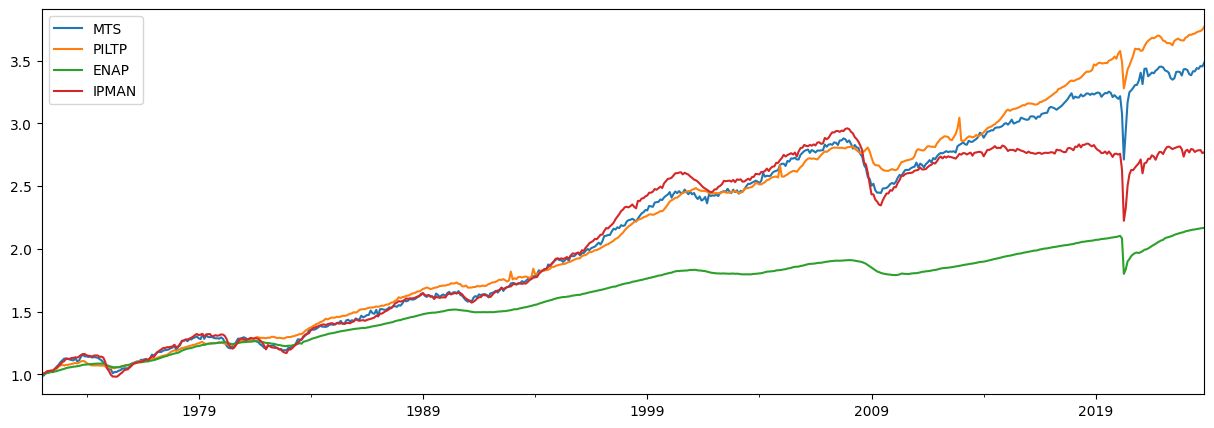

In [6]:
(df/df.iloc[0]).plot(figsize=(15,5))
# plt.fill_between(df.index, 0, 1, where=recession.values, color="k", alpha=0.1)
plt.show()

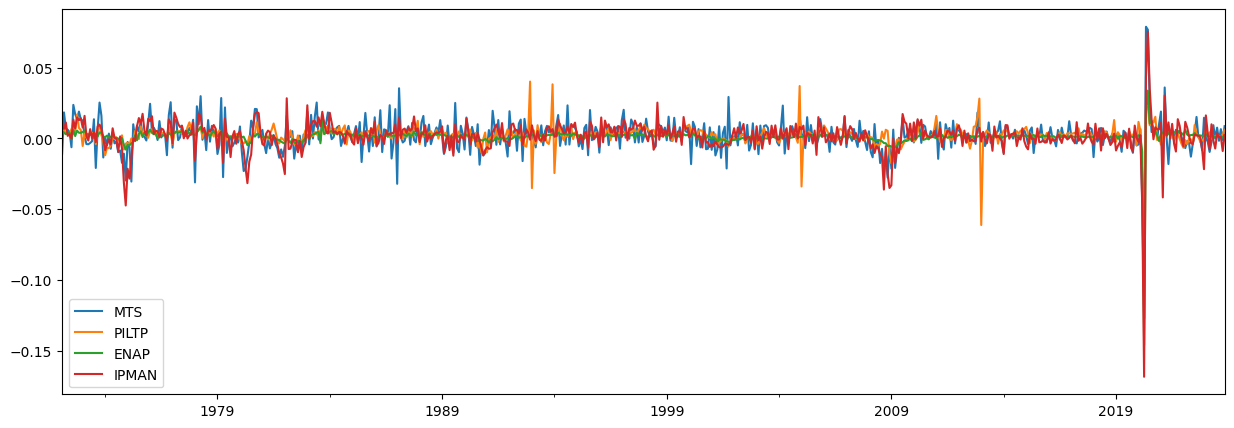

In [7]:
df2 = df.apply(lambda x: np.log(x))
df2 = df2.diff()
df2 = df2.dropna()
df2.plot(figsize=(15,5))
plt.show()

# Factor model without switching

In [13]:
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
dfm = DynamicFactor(
    df2, 
                                      k_factors=1, 
                                      factor_order=2, 
                                      error_order=2,
                                      error_var=False,
                                      enforce_stationarity=False
                                      )

res = dfm.fit(maxiter=500)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.87701D+00    |proj g|=  5.52288D+01


 This problem is unconstrained.



At iterate    5    f= -1.14095D+01    |proj g|=  1.65561D+01

At iterate   10    f= -1.14164D+01    |proj g|=  2.75764D+00

At iterate   15    f= -1.15573D+01    |proj g|=  5.92460D+01

At iterate   20    f= -1.16419D+01    |proj g|=  4.18508D+00

At iterate   25    f= -1.20243D+01    |proj g|=  4.24429D+01

At iterate   30    f= -1.21700D+01    |proj g|=  3.05888D+01

At iterate   35    f= -1.25840D+01    |proj g|=  2.40892D+02

At iterate   40    f= -1.30377D+01    |proj g|=  3.48399D+01

At iterate   45    f= -1.36764D+01    |proj g|=  5.24375D+01

At iterate   50    f= -1.40609D+01    |proj g|=  4.07610D+01

At iterate   55    f= -1.41457D+01    |proj g|=  1.61624D+00

At iterate   60    f= -1.41459D+01    |proj g|=  1.27896D+00

At iterate   65    f= -1.41646D+01    |proj g|=  1.88392D+01

At iterate   70    f= -1.42316D+01    |proj g|=  5.65526D+00

At iterate   75    f= -1.42516D+01    |proj g|=  3.03806D+00

At iterate   80    f= -1.42519D+01    |proj g|=  2.09168D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18    101    178      2     0     0   6.380D-02  -1.426D+01
  F =  -14.260052744692528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [14]:
print(res.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['MTS', 'PILTP', 'ENAP', 'IPMAN']   No. Observations:                  622
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood                8869.753
                                      + AR(2) errors   AIC                         -17703.506
Date:                               Thu, 01 Feb 2024   BIC                         -17623.713
Time:                                       14:30:13   HQIC                        -17672.494
Sample:                                   02-01-1972                                         
                                        - 11-01-2023                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):     0.29, 2.35, 0.08, 0.09   Jarque-Bera (JB):   30901.58, 18410.84, 1271590.21, 451.62
Prob(Q):                0.59, 0.13, 0.78, 0.76